In [2]:
import pickle
import tarfile
import os
import numpy as np

def load_cifar10_data(file_path):
    with open(file_path, 'rb') as file:
        data = pickle.load(file, encoding='bytes')
        return data[b'data'], data[b'labels']

def unpack_cifar10_dataset(tar_file_path, extract_to):
    with tarfile.open(tar_file_path, 'r:gz') as file:
        file.extractall(path=extract_to)

# Unpack the dataset
unpack_cifar10_dataset('/content/cifar-10-python.tar.gz', 'cifar-10-data')

# Loading the data
data_batches = []
labels = []

for i in range(1, 6):
    data_batch, label_batch = load_cifar10_data(f'cifar-10-data/cifar-10-batches-py/data_batch_{i}')
    data_batches.append(data_batch)
    labels.extend(label_batch)

data = np.vstack(data_batches)
labels = np.array(labels)


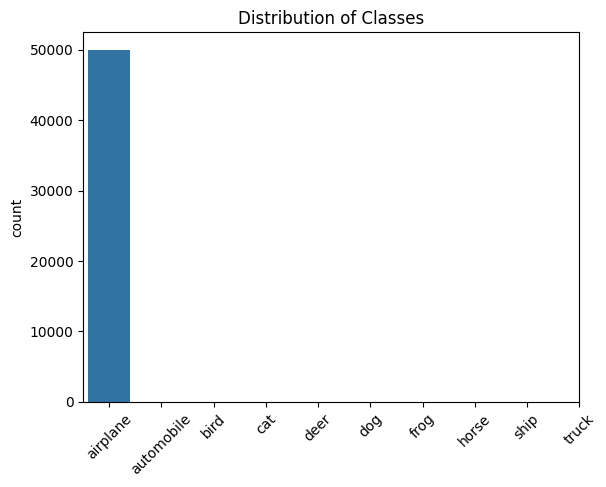

In [3]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Defining the class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Displaying the distribution of classes
sns.countplot(labels)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.title('Distribution of Classes')
plt.show()


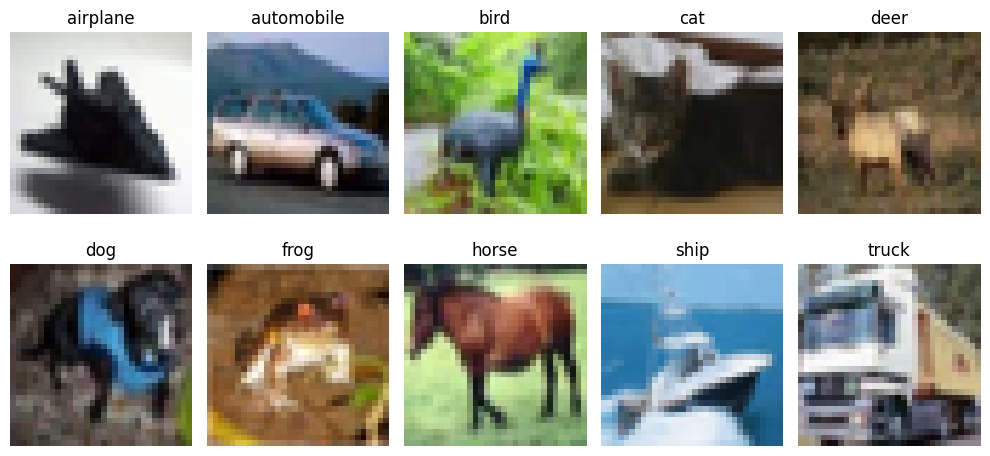

In [4]:

def display_sample_images(data, labels, class_names):
    fig, axes = plt.subplots(2, 5, figsize=(10, 5))
    for i, ax in enumerate(axes.flat):
        idx = np.where(labels == i)[0][0]
        img = data[idx].reshape(3, 32, 32).transpose(1, 2, 0)
        ax.imshow(img)
        ax.set_title(class_names[i])
        ax.axis('off')

    plt.tight_layout()
    plt.show()

display_sample_images(data, labels, class_names)


--2023-10-31 22:19:59--  https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz
Resolving www.cs.toronto.edu (www.cs.toronto.edu)... 128.100.3.30
Connecting to www.cs.toronto.edu (www.cs.toronto.edu)|128.100.3.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 170498071 (163M) [application/x-gzip]
Saving to: ‘cifar-10-python.tar.gz.1’

cifar-10-python.tar 100%[===================>] 162.60M  57.8MB/s    in 2.8s    

2023-10-31 22:20:04 (57.8 MB/s) - ‘cifar-10-python.tar.gz.1’ saved [170498071/170498071]

cifar-10-batches-py/
cifar-10-batches-py/data_batch_4
cifar-10-batches-py/readme.html
cifar-10-batches-py/test_batch
cifar-10-batches-py/data_batch_3
cifar-10-batches-py/batches.meta
cifar-10-batches-py/data_batch_2
cifar-10-batches-py/data_batch_5
cifar-10-batches-py/data_batch_1


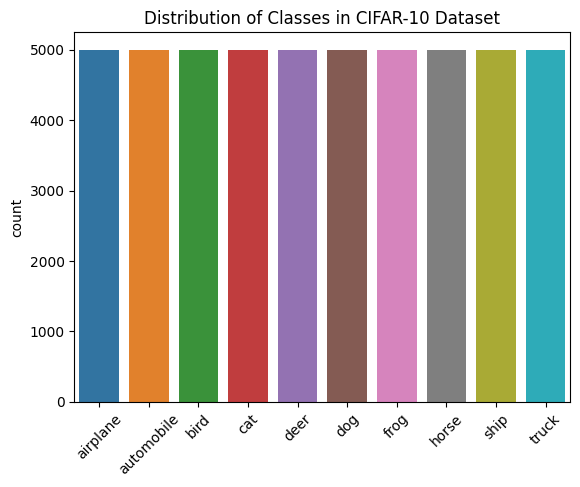

In [8]:
# Downloading the CIFAR-10 dataset
!wget https://www.cs.toronto.edu/~kriz/cifar-10-python.tar.gz

# Extracting the downloaded dataset
!tar -xvzf cifar-10-python.tar.gz

# Importing necessary libraries
import pickle
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Function to load a single batch of CIFAR-10 dataset
def load_cifar10_batch(file_path):
    with open(file_path, 'rb') as file:
        batch = pickle.load(file, encoding='latin1')
    return batch

# Loading all batches and merging them
data_batches = []
labels_batches = []

for i in range(1, 6):
    batch = load_cifar10_batch(f'cifar-10-batches-py/data_batch_{i}')
    data_batches.append(batch['data'])
    labels_batches.append(batch['labels'])

# Stacking the data and labels
data = np.vstack(data_batches)
labels = np.hstack(labels_batches)

# Defining class names
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

# Plotting the distribution of classes
sns.countplot(x=labels)
plt.xticks(ticks=np.arange(10), labels=class_names, rotation=45)
plt.title('Distribution of Classes in CIFAR-10 Dataset')
plt.show()


In [9]:
from tensorflow.keras.utils import to_categorical

# Normalizing the images
data = data / 255.0

# Reshaping the data to be in the format (num_samples, height, width, num_channels)
data = data.reshape((-1, 3, 32, 32)).transpose(0, 2, 3, 1)

# One-hot encoding the labels
labels = to_categorical(labels)

# Displaying the shapes to verify the preprocessing steps
print(f"Data Shape: {data.shape}")
print(f"Labels Shape: {labels.shape}")


Data Shape: (50000, 32, 32, 3)
Labels Shape: (50000, 10)


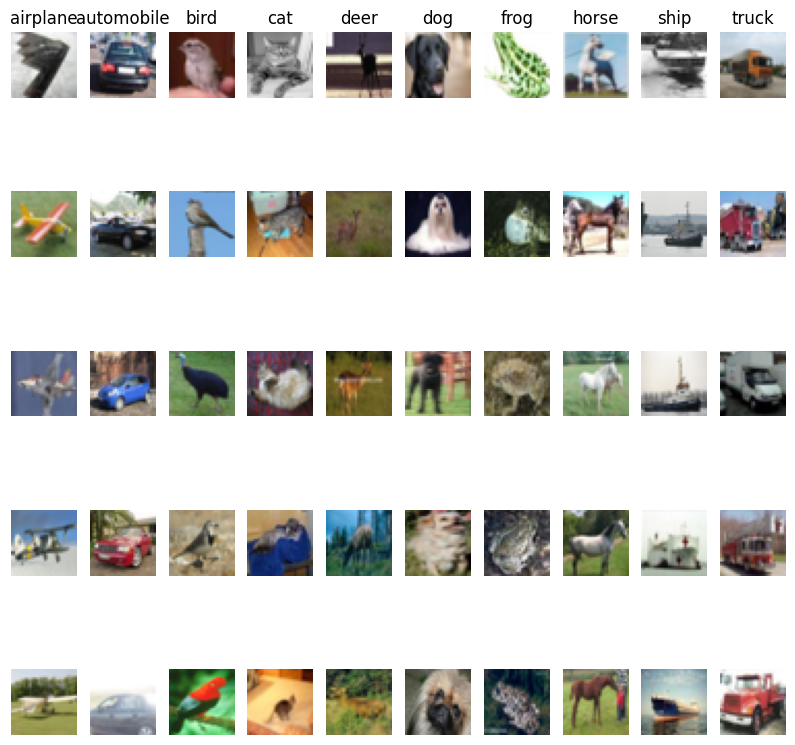

Sample Label (One-Hot Encoded): [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
Corresponding Class: frog


In [10]:
import matplotlib.pyplot as plt

# Function to display sample images from the dataset
def display_sample_images(data, labels, class_names, samples_per_class=5):
    num_classes = len(class_names)
    for y, cls in enumerate(class_names):
        idxs = np.flatnonzero(np.argmax(labels, axis=1) == y)
        idxs = np.random.choice(idxs, samples_per_class, replace=False)
        for i, idx in enumerate(idxs):
            plt_idx = i * num_classes + y + 1
            plt.subplot(samples_per_class, num_classes, plt_idx)
            plt.imshow(data[idx])
            plt.axis('off')
            if i == 0:
                plt.title(cls)

# Displaying the normalized images
plt.figure(figsize=(10, 10))
display_sample_images(data, labels, class_names)
plt.show()

# Displaying a sample one-hot encoded label
sample_label_idx = 0
print(f"Sample Label (One-Hot Encoded): {labels[sample_label_idx]}")
print(f"Corresponding Class: {class_names[np.argmax(labels[sample_label_idx])]}")

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


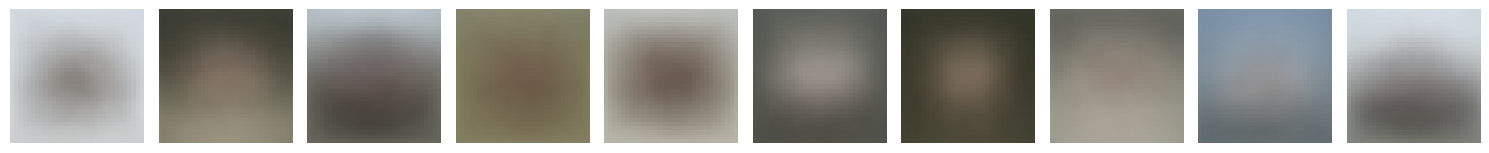

In [11]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Taking a sample of the data
sample_size = 10000
sample_indices = np.random.choice(np.arange(data.shape[0]), size=sample_size, replace=False)
data_sample = data[sample_indices]

# Applying PCA for dimensionality reduction
pca = PCA(n_components=100)
data_pca = pca.fit_transform(data_sample.reshape((data_sample.shape[0], -1)))

# Applying K-Means clustering
kmeans = KMeans(n_clusters=10, random_state=42)
clusters = kmeans.fit_predict(data_pca)

# Function to visualize the centroids as images
def visualize_centroids(centroids, pca, shape=(32, 32, 3)):
    centroids = pca.inverse_transform(centroids)
    centroids = centroids.reshape((-1, *shape))
    fig, axes = plt.subplots(1, centroids.shape[0], figsize=(15, 5))
    for i, ax in enumerate(axes.flat):
        ax.imshow(centroids[i])
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizing the centroids
visualize_centroids(kmeans.cluster_centers_, pca)

In [12]:
from sklearn.ensemble import IsolationForest

# Applying Isolation Forest for anomaly detection
iso_forest = IsolationForest(contamination=0.01, random_state=42)
anomalies = iso_forest.fit_predict(data_pca)

# Function to visualize anomalies
def visualize_anomalies(data, anomalies, shape=(32, 32, 3)):
    anomaly_indices = np.where(anomalies == -1)[0]
    num_anomalies = len(anomaly_indices)
    fig, axes = plt.subplots(1, num_anomalies, figsize=(15, 5))
    for i, idx in enumerate(anomaly_indices):
        ax = axes if num_anomalies == 1 else axes[i]
        ax.imshow(data[idx].reshape(shape))
        ax.axis('off')
    plt.tight_layout()
    plt.show()

# Visualizing the detected anomalies
visualize_anomalies(data_sample, anomalies)


<ipython-input-12-1510bf922514>:16: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


In [13]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.utils import to_categorical

# Load and preprocess the dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0  # Normalize data
y_train, y_test = to_categorical(y_train), to_categorical(y_test)  # One-hot encode labels

# Define the CNN model
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)

# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f'Test Accuracy: {test_acc:.4f}')

170498071/170498071 [==============================] - 3s 0us/step
Epoch 1/10
625/625 [==============================] - 49s 75ms/step - loss: 1.6348 - accuracy: 0.3988 - val_loss: 1.3781 - val_accuracy: 0.5044
Epoch 2/10
625/625 [==============================] - 48s 76ms/step - loss: 1.2794 - accuracy: 0.5430 - val_loss: 1.2372 - val_accuracy: 0.5592
Epoch 3/10
625/625 [==============================] - 48s 76ms/step - loss: 1.1343 - accuracy: 0.6005 - val_loss: 1.0924 - val_accuracy: 0.6161
Epoch 4/10
625/625 [==============================] - 46s 74ms/step - loss: 1.0258 - accuracy: 0.6364 - val_loss: 1.0202 - val_accuracy: 0.6432
Epoch 5/10
625/625 [==============================] - 48s 76ms/step - loss: 0.9452 - accuracy: 0.6678 - val_loss: 0.9815 - val_accuracy: 0.6573
Epoch 6/10
625/625 [==============================] - 47s 75ms/step - loss: 0.8750 - accuracy: 0.6916 - val_loss: 0.9861 - val_accuracy: 0.6606
Epoch 7/10
625/625 [==============================] - 46s 74ms/step -

KeyError: ignored

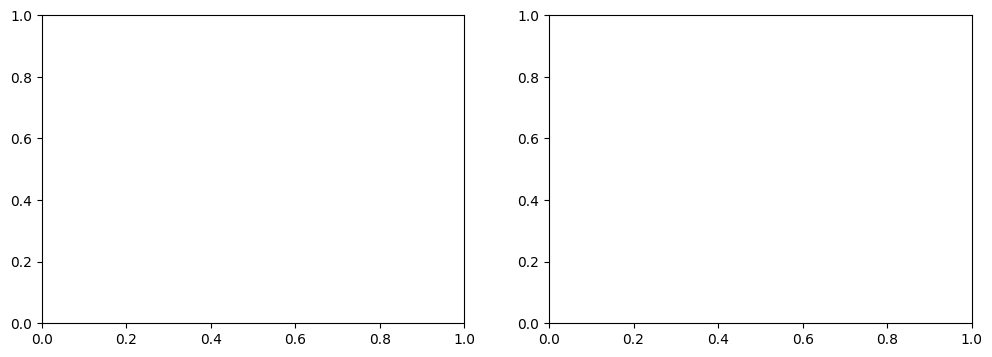

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.metrics import confusion_matrix, classification_report

# Function to plot training history
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

    ax1.plot(history.history['accuracy'], label='train')
    ax1.plot(history.history['val_accuracy'], label='validation')
    ax1.set_title('Model Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend()

    ax2.plot(history.history['loss'], label='train')
    ax2.plot(history.history['val_loss'], label='validation')
    ax2.set_title('Model Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend()

    plt.tight_layout()
    plt.show()

# Plot training history
plot_training_history(model.history)

# Getting model predictions
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Creating a confusion matrix
conf_mat = confusion_matrix(y_true_classes, y_pred_classes)

# Plotting the confusion matrix
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

# Printing a classification report
print(classification_report(y_true_classes, y_pred_classes, target_names=class_names))